# Homework 3 - Optimization

## Imports and utilities

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
import math

In [71]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [72]:
def split_data(X, Y, Ntrain):
    """
    Given X and Y (Data and labels respectively), split the data into a 
    training and a test set. The number of observations in each will be
    determined by Ntrain.
    """

    d, N = X.shape

    # Create a vector with the indices of the data. Then shuffle it.
    idx = np.arange(N)
    np.random.shuffle(idx)

    # Get the respective indices for each set.
    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    # Now get both sets for each matrix.
    Xtrain = X[:, train_idx]
    Xtest = X[:, test_idx]

    Ytrain = Y[train_idx]
    Ytest = Y[test_idx]

    return Xtrain, Xtest, Ytrain, Ytest

In [73]:
def acc(Ypredicted, Y):
    true_preds = Ypredicted == Y
    true_preds = sum(true_preds.astype(int))
    acc = true_preds / len(Y)

    return acc, true_preds

## Gradient Descent

### Definition of the function

In [74]:
def GD(f, grad_f, x0, tolf, tolx, kmax, alpha=None, xstar=None, store_it=False):
    """
    Compute one stationary point of a given function using the gradient descent method.

    Parameters:
        - f: Function to be computed the stationary point
        - grad_f: Gradient of f
        - x0: Initial iteration
        - tolf: Tollerance of f that must be reached to stop the algorithm
        - tolx: Tollerance between iterations that must be reached to stop the algorithm
        - kmax: Maximun number of iterations allowed to be executed
        - alpha: Step length for the GD. If none is given, then uses backtracking.

    Return:
        - x: The stationary point
        - f_val: A vector containing the values of f during the iterations
        - err_val: A vector containinig the values of || grad_f(x_k) ||
        - errx_val: A vector containing the values of || x_k - x_0 ||
    """

    # Initialization
    # Create the vector we want to return
    f_val = np.zeros((kmax+1,))
    err_val = np.zeros((kmax+1,))
    errx_val = np.zeros((kmax+1,)) if type(xstar) == np.ndarray else None
    if store_it == True:
        x_its = np.zeros((kmax+1, x0.shape[0]))
        x_its[0, :] = x0.reshape(1,-1)
    else:
        x_its = None

    # Start the iterations
    k = 0
    xk = x0
    xk_prev = x0
    bt = False          # Variable to control the use of backtracking
    if alpha == None:
        bt = True

    # Define stopping criterias
    stpCr1 = np.linalg.norm(grad_f(xk)) < tolf*np.linalg.norm(x0)
    stpCr2 = np.linalg.norm((grad_f(xk) - grad_f(xk_prev))) < tolx*np.linalg.norm(x0)
    stpCr3 = k >= kmax

    conditions = stpCr1 or stpCr2 or stpCr3

    while not conditions:

        if bt: alpha = backtracking(f, grad_f, xk) # Update alpha
        xk = xk_prev - alpha*grad_f(xk_prev)                # Update x
        k += 1                                              # Update k

        # Save the values
        f_val[k] = f(xk)
        err_val[k] = np.linalg.norm(grad_f(xk))
        if type(xstar) == np.ndarray:
            errx_val[k] = np.linalg.norm((grad_f(xk) - grad_f(xstar)))

        # Update conditions
        stpCr1 = err_val[k] < tolf*np.linalg.norm(x0)
        stpCr2 = np.linalg.norm((grad_f(xk) - grad_f(xk_prev))) < tolx*np.linalg.norm(x0)
        stpCr3 = k >= kmax
        conditions = stpCr1 or stpCr2 or stpCr3

        # Restart 
        xk_prev = xk
        if store_it == True:
            x_its[k, :] = xk.reshape(1,-1)

    # Truncate the vectors
    f_val = f_val[:k]
    err_val = err_val[:k]
    errx_val = errx_val[:k] if type(xstar) == np.ndarray else None

    return xk, f_val, err_val, errx_val, x_its

### Computation of points

In [75]:
# DEFINE SOME PARAMETERS
N = 2                                   # Number of features
kmax = 100                              # Maximum iterations
x0 = np.zeros((N,)).reshape(N, 1)       # Initial iteration
xstar1 = np.array([3,1]).reshape(N,1)   # Minimal point defined for f1
xstar2 = np.array([1,2]).reshape(N,1)   # Minimal point defined for f2

In [76]:
# FUNCTION 1
f1 = lambda x: (x[0] - 3)**2 + (x[1] - 1)**2
grad_f1 = lambda x: np.array([2*x[0] - 6, 2*x[1] - 2]).reshape(2, 1)

# FUNCTION 2
f2 = lambda x: 10*(x[0] - 1)**2 + (x[1] - 2)**2
grad_f2 = lambda x: np.array([20*(x[0] - 1), 2*x[1] - 4]).reshape(2, 1)

In [77]:
# Setting alpha = None -> Backtracking for the computation of the step length
xk1, f_val1, err_val1, errx_val1, x_its1 = GD(f1, grad_f1, x0, tolf=0, tolx=0, kmax=kmax, alpha=None, xstar=xstar1, store_it=True)
xk2, f_val2, err_val2, errx_val2, x_its2 = GD(f2, grad_f2, x0, tolf=0, tolx=0, kmax=kmax, alpha=None, xstar=xstar2, store_it=True)

print(f"Computed minimun for function 1:\n{xk1}")
print(f"Computed minimun for function 2:\n{xk2}")

Computed minimun for function 1:
[[2.99999524]
 [0.99999841]]
Computed minimun for function 2:
[[1.        ]
 [1.99999352]]


In [78]:
# DEFINE SOME PARAMETERS
N = 5                               # Number of features
x0 = np.zeros((N,)).reshape(N, 1)   # Initial iteration

In [79]:
# FUNCTION 3
v = np.linspace(0, 1, N)

A = np.vander(v, N)
xtrue = np.ones(N).reshape(N, 1)
b = A @ xtrue

f3 = lambda x: (0.5)*np.linalg.norm((A @ x - b))**2
# We need to do this to return the column vector
grad_f3 = lambda x: ((A @ x - b).T @ A).reshape(N, 1)

# FUNCTION 4
ld = 0.3

f4 = lambda x: (0.5)*np.linalg.norm(A @ x - b)**2 + (ld/2)*np.linalg.norm(x)**2
grad_f4 = lambda x: ((A @ x - b).T @ A).reshape(N, 1) + ld*x

In [80]:
xk3, f_val3, err_val3, _, _ = GD(f3, grad_f3, x0, 0, 0, kmax)
xk4, f_val4, err_val4, _, _ = GD(f4, grad_f4, x0, 0, 0, kmax)

print(f"Computed minimun for function 3:\n{xk3}")
print(f"Computed minimun for function 4:\n{xk4}")

Computed minimun for function 3:
[[0.98227293]
 [0.99626076]
 [1.00979358]
 [1.01325828]
 [0.99559018]]
Computed minimun for function 4:
[[0.87892697]
 [0.91015119]
 [0.95222899]
 [1.00671773]
 [1.01520359]]


In [81]:
# DEFINE SOME PARAMETERS
N = 1                               # Number of features
x0 = np.zeros((N,)).reshape(N, 1)   # Initial iteration

In [82]:
# FUNCTION 5
f5 = lambda x: x**4 + x**3 - 2*x**2 - 2*x
grad_f5 = lambda x: 4*x**3 + 3*x**2 - 4*x -2

In [83]:
xk5, f_val5, err_val5, _, _ = GD(f5, grad_f5, x0, 0, 0, kmax)

print(f"Computed minimun for function 5:\n{xk5}")

Computed minimun for function 5:
[[0.92222479]]


### Plot of results

In [84]:
err_val = [err_val1, err_val2, err_val3, err_val4, err_val5]
errx_val = [errx_val1, errx_val2]

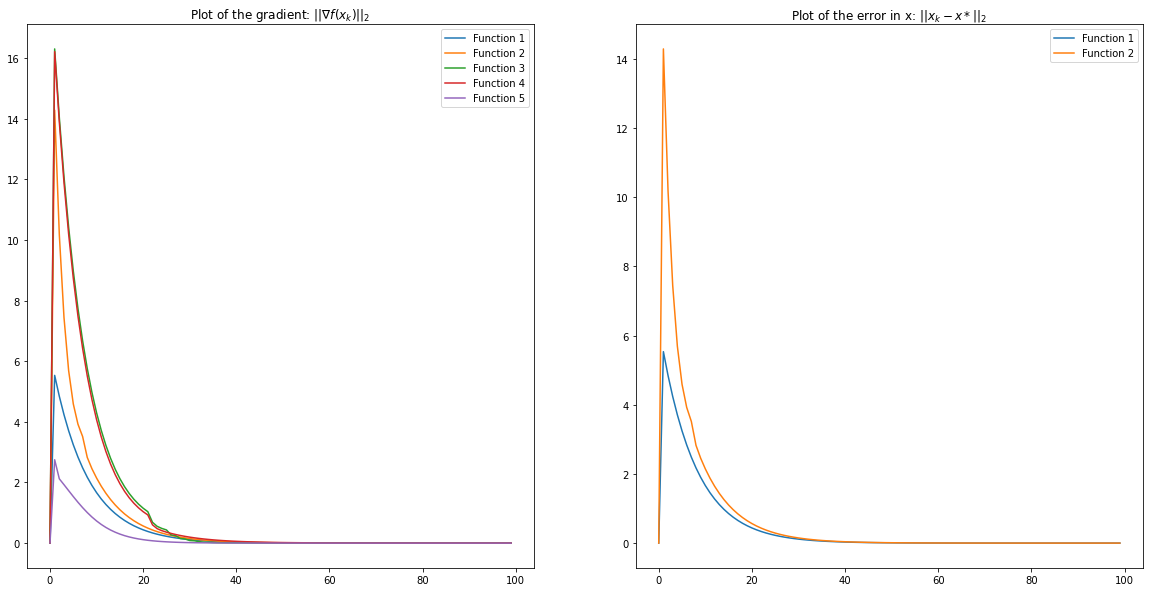

In [85]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
names = []
plt.title(r"Plot of the gradient: $||\nabla f(x_k)||_2$")
for i in range(5):
    name = f"Function {i+1}"
    names.append(name)
    plt.plot(err_val[i])
plt.legend(names)

plt.subplot(1, 2, 2)
names = []
plt.title(r"Plot of the error in x: $||x_k - x*||_2$")
for i in range(len(errx_val)):
    name = f"Function {i+1}"
    names.append(name)
    plt.plot(errx_val[i])
plt.legend(names)

plt.show()

We can notice $f_5$ is has the fastest convergence speed. In the end the amount of features present in the vector has an effect on this. We can see the slowest convergence rates belong to $f_3$ and $f_4$, since these has $5$ features.

### Testing $f_5$ with differents $\alpha$

In [86]:
# DEFINE SOME PARAMETERS
N = 1
x0 = np.zeros((N,)).reshape(N, 1)

In [87]:
xk5_1, _, _, _, _ = GD(f5, grad_f5, x0, tolf=0, tolx=0, kmax=kmax, alpha=0.4)
xk5_2, _, _, _, _ = GD(f5, grad_f5, x0, tolf=0, tolx=0, kmax=kmax, alpha=0.3)
xk5_3, _, _, _, _ = GD(f5, grad_f5, x0, tolf=0, tolx=0, kmax=kmax, alpha=0.25)

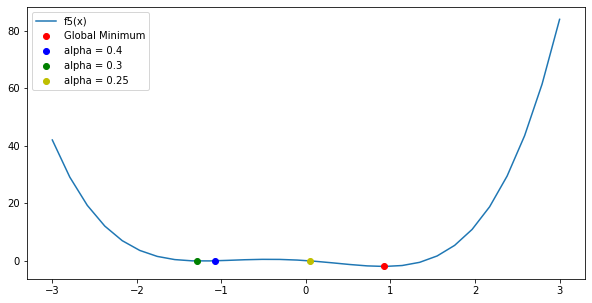

In [88]:
# Contour of plot functions
xv = np.linspace(-3, 3, 30)

names = ["f5(x)", "Global Minimum", "alpha = 0.4", "alpha = 0.3", "alpha = 0.25"]
points = [xk5, xk5_1, xk5_2, xk5_3]
colors = ["ro", "bo", "go", "yo"]

plt.figure(figsize=(10, 5))
plt.plot(xv, f5(xv))

for i in range(len(points)):
    plt.plot(points[i], f5(points[i]), colors[i])

plt.legend(names)
plt.show()

### Path defined by iterations for $f_1$ and $f_2$

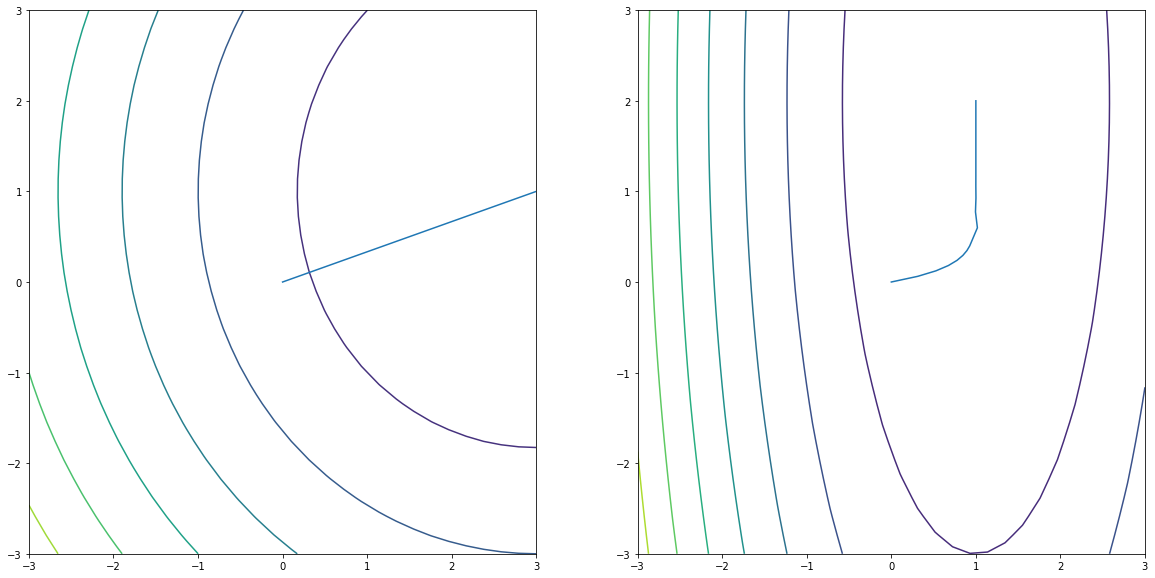

In [89]:
# Contour of plot functions
xv = np.linspace(-3, 3, 30)
yv = np.linspace(-3, 3, 30)
xx, yy = np.meshgrid(xv, yv)

# The element in position xx[i, j] is the x-coordinate of the intersection i, j into the grid

# Compute the value of f over the grid
zz1 = f1([xx, yy])
zz2 = f2([xx, yy])

# Contour plot
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.contour(xx, yy, zz1)
plt.plot(x_its1[:, 0], x_its1[:, 1])

plt.subplot(1, 2, 2)
plt.contour(xx, yy, zz2)
plt.plot(x_its2[:, 0], x_its2[:, 1])

plt.show()

## Stochastic Gradient Descent

$f_w(x) = \sigma(\hat{x}^Tw)$

$f_w(\hat{X}) = [f_w(\hat{x}^1), f_w(\hat{x}^2)...f_w(\hat{x}^N)] \in R^N$

### Definition of the function

To perform the SGD method we first need to define some functions:

#### The sigmoid function
The sigmoid function is defined in order to squeeze the real axis to the domain $[0, 1]$.
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ 

#### Model function:
- $f_w(x) = \sigma(\hat{x}^Tw)$

#### The loss function:
- $l(w;D) = \frac{1}{2N} ||f_w(\hat{X}) - Y||_2^2$

#### Gradient function:
- $\nabla l(w;D) = \frac{1}{N}\hat{X}^T(f_w(X) \odot (1 - f_w(X)) \odot (f_w(X) - Y))$
Keep in mind $\odot$ represents the element-wise multiplication.

In [111]:
# FUNCTIONS FOR THE SGD

# SIGMOID FUNCTION
def sigmoid(x):
    return 1/(1+math.e**(-x))

# MODEL FUNCTION
def f(w, xhat):
    return sigmoid(xhat.T @ w)

# LOSS FUNCTION
def ell(w, X, Y):
    """
    Compute the value of the loss using the selected loss function.

    Parameters:
        - w: Weighted vector.
        - X: X dataset
        - Y: Y dataset
    Return:
        - loss: Value of the loss
    """

    k, N = X.shape  # Keep in mind that for X = Xhat, k = d+1

    norm = np.linalg.norm(f(w, X) - Y)
    loss = (1/(2*N))*norm**2

    return loss

# GRADIENT FUNCTION
def grad_ell(w, X, Y):
    """
    Gradient of the loss function
    """

    k, N = X.shape  # Keep in mind that if X = Xhat, then k = d+1

    grad = 0
    for i in range(N):
        xi = X[:, i].reshape((-1, 1))
        fwx = f(w, xi)
        grad += (1/N) * xi @ (fwx * (1 - fwx) * (fwx - Y[i]))

    return grad

In [113]:
def SGD(l, grad_l, w0, data, batch_size, n_epochs):
    """
    Compute one stationary point of a given function using the stochastic gradient descent method.

    Parameters:
        - l: Function to be computed the stationary point
        - grad_l: Gradient of f
        - w0: Initial iteration
        - D: Dataset
        - batch_size: 
        - n_epochs: 

    Return:
        - w: The stationary point
        - f_val: A vector containing the values of f during the iterations
        - err_val: A vector containinig the values of || grad_f(x_k) ||
    """
    # D = (X, Y) where:
    #   X: d x N
    #   Y: N
    #   d = number of features
    #   N = number of samples
    X, Y = data         # Extract data
    d, N = X.shape      # Get the dimensionality of the problem

    # Calculate the number of batches per epoch
    n_batch_iters = N // batch_size
    print(f"Number of batch iterations to be performed: {n_batch_iters}")

    alpha = 1e-3     # Fix step length

    w_vec = [w0]
    f_vec = [l(w0, X, Y)]
    grad_f_vec = [grad_l(w0, X, Y)]
    err_vec = [np.linalg.norm(grad_l(w0, X, Y))]

    # Epoch loop
    for epoch in range(n_epochs):

        # This is just to have some feedback on the screen while executing
        print(f"Epoch {epoch+1}/{n_epochs}")
        
        # Create a back-up of the dataset
        X_backup = np.copy(X)
        Y_backup = np.copy(Y)

        # Batch iteration
        for k in range(n_batch_iters):
            
            # Get again the dimensionality of the problem
            # It will change since each epoch we are reducing the number of samples in the whole dataset
            d, N = X.shape

            # Classical random sampling using index
            idx = np.arange(N)
            np.random.shuffle(idx)  #TODO Search for a way of doing this with random seed
            batch_idx = idx[:batch_size]

            # Extract the batch from the data
            Mx = X[:, batch_idx]  # d x batch_size
            My = Y[batch_idx]     # batch_size

            # Remove the batches from the original dataset
            X = np.delete(X, batch_idx, axis=1)
            Y = np.delete(Y, batch_idx)

            # Update w
            # TODO Perform the gradient aproximation outside of the function
            w = w0 - alpha*grad_l(w0, Mx, My)
            w_vec.append(w)

            # Restart 
            w0 = w
        
        # Reload X and Y
        X = X_backup
        Y = Y_backup
        f_vec.append(l(w,X,Y))
        grad_f_vec.append(grad_l(w,X,Y))
        err_vec.append(np.linalg.norm(grad_l(w,X,Y)))
        # ATTENTION: Shuffle again (differently)

    return w, f_vec, grad_f_vec, err_vec

# REMEMBER: In SGD, w0 should be chosen randomly (Sample from gaussian)
# Upgrade: Modify the code above to return f_val (over M)
#   f_val[k] = l(w_k, M)

### Testing of the algorithm - Logistic Regressor

In [114]:
data = pd.read_csv("data.csv")  # Read data into memory
data = np.array(data)           # Cast to numpy array
data = data.T                   # Transpose it

# Split data matrix into X and Y
X = data[1:, :]
Y = data[0, :]

# SELECTION OF DIGITS
#-----------------------------------------------------------------------------
digits = [6, 9]

datapoints = np.zeros(Y.shape, dtype=bool)
for i in range(len(digits)):
    datapoints += np.array(Y==digits[i])

X = X[:, datapoints]        # Select from each matrix the positions we want.
Y = Y[datapoints]

print(f"Shape of the final dataset: {X.shape}\nNumber of labels in Y dataset: {Y.shape}")     # Check shape
print(f"Present digits on the dataset: {np.unique(Y)}")         # Check we onyl have the digits we want

# Convert labels to 0/1 values
Y[Y == digits[0]] = 0
Y[Y == digits[1]] = 1
#-----------------------------------------------------------------------------

# TRAIN AND TEST SPLITTING
#-----------------------------------------------------------------------------
d, N = X.shape
Ntrain = round(0.8 * N) # Take an 80% of the total data to do the training set.

Xtrain, Xtest, Ytrain, Ytest = split_data(X, Y, Ntrain)

# Change the shape of Y vectors to have the column versions
Ytrain = Ytrain.reshape((-1,))
Ytest = Ytest.reshape((-1,))

print(f"Final shape of the splitted datasets:\n- Xtrain: {Xtrain.shape}\n- Ytrain: {Ytrain.shape}\n- Xtest: {Xtest.shape}\n- Ytest: {Ytest.shape}")
#-----------------------------------------------------------------------------

Shape of the final dataset: (784, 8325)
Number of labels in Y dataset: (8325,)
Present digits on the dataset: [6 9]
Final shape of the splitted datasets:
- Xtrain: (784, 6660)
- Ytrain: (6660,)
- Xtest: (784, 1665)
- Ytest: (1665,)


Generate the $\hat{X}$ dataset by adding a row of 1s to each feature vector.

$\hat{x} = [1,x_1,x_2,...,x_d]^T$

$\hat{X} = [\hat{x}^1, \hat{x}^1,...,\hat{x}^N] \in R^{(d+1)xN}$

In [115]:
# Create Xhat
_, Ntrain = Xtrain.shape
Xhat = np.concatenate((np.ones((1,Ntrain)), Xtrain), axis=0)
print("Notice we have added a row with 1s: \n", Xhat[0:6, :])

Notice we have added a row with 1s: 
 [[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [116]:
def predict(w, X, threshold=0.5):
    """
    Predict the samples in X using the weighted vector trained with
    logistic regression.

    Parameters:
        - w: Trained weighted vector.
        - X: Test dataset to be predicted.
        - threshold: Threshold to decide the class of the sample to be predicted.
    Return:
        - Y: Labels of the predicted samples.
    """
    
    d, N = X.shape
    Y_pred = np.empty((N,))

    preds = f(w, X)
    
    Y_pred = (preds >= threshold).reshape((-1,))

    return Y_pred.astype(int)

In [117]:
k, N = Xhat.shape
w0 = np.random.normal(0, 0.1, (k, 1))
n_epochs = 20
batch_size = 15
w, f_vec, grad_f_vec, err_vec = SGD(ell, grad_ell, w0, (Xhat, Ytrain), batch_size=batch_size, n_epochs=n_epochs)

Number of batch iterations to be performed: 444
Epoch 1/20


C:\Users\aeste\AppData\Local\Temp/ipykernel_17396/1154815548.py:5: RuntimeWarning: overflow encountered in power
  return 1/(1+math.e**(-x))


Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [118]:
_, Ntest = Xtest.shape

# Generate Xhat also for the test set
Xhat_test = np.concatenate((np.ones((1,Ntest)), Xtest), axis=0)

Ypredicted = predict(w, Xhat_test)

C:\Users\aeste\AppData\Local\Temp/ipykernel_17396/1154815548.py:5: RuntimeWarning: overflow encountered in power
  return 1/(1+math.e**(-x))


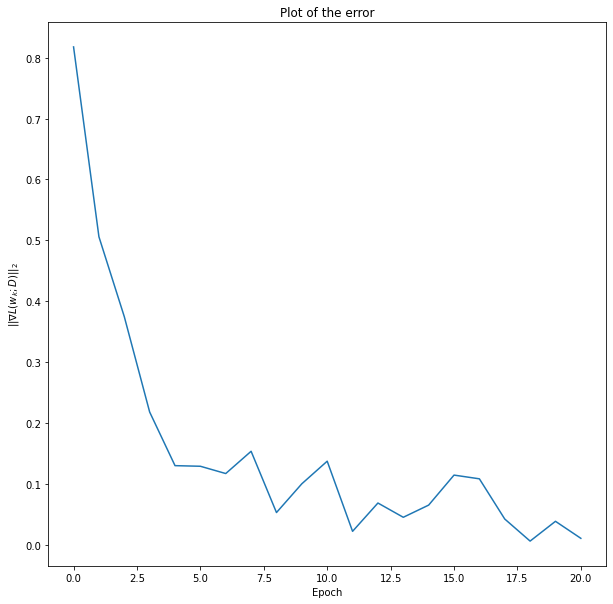

In [119]:
x_axis = np.arange(n_epochs+1)

plt.figure(figsize=(10,10))
plt.plot(x_axis, err_vec)
plt.xlabel("Epoch")
plt.ylabel(r"$||\nabla L(w_k; D)||_2$")
plt.title("Plot of the error")

plt.show()

In [120]:
acc(Ypredicted, Ytest)

(0.9843843843843844, 1639)

### Testing GD vs SGD

#### Definition of the functions

In [147]:
def GD_data(f, grad_f, x0, data, tolf, tolx, kmax, alpha=0.1):
    """
    Compute one stationary point of a given function using the gradient descent method.

    Parameters:
        - f: Function to be computed the stationary point
        - grad_f: Gradient of f
        - x0: Initial iteration
        - tolf: Tollerance of f that must be reached to stop the algorithm
        - tolx: Tollerance between iterations that must be reached to stop the algorithm
        - kmax: Maximun number of iterations allowed to be executed
        - alpha: Step length for the GD. If none is given, then uses backtracking.

    Return:
        - x: The stationary point
        - f_val: A vector containing the values of f during the iterations
        - err_val: A vector containinig the values of || grad_f(x_k) ||
    """

    # Initialization
    # Create the vector we want to return
    f_val = np.zeros((kmax+1,))
    err_val = np.zeros((kmax+1,))

    # Start the iterations
    k = 0
    xk = x0
    xk_prev = x0

    # Get the data
    X, Y = data

    # Define stopping criterias
    stpCr1 = np.linalg.norm(grad_f(xk, X, Y)) < tolf*np.linalg.norm(x0)
    stpCr2 = np.linalg.norm((grad_f(xk, X, Y) - grad_f(xk_prev, X, Y))) < tolx*np.linalg.norm(x0)
    stpCr3 = k >= kmax

    conditions = stpCr1 or stpCr2 or stpCr3

    while not conditions:

        xk = xk_prev - alpha*grad_f(xk_prev, X, Y)          # Update x
        k += 1                                              # Update k

        # Save the values
        f_val[k] = f(xk, X, Y)
        err_val[k] = np.linalg.norm(grad_f(xk, X, Y))

        # Update conditions
        stpCr1 = err_val[k] < tolf*np.linalg.norm(x0)
        stpCr2 = np.linalg.norm((grad_f(xk, X, Y) - grad_f(xk_prev, X, Y))) < tolx*np.linalg.norm(x0)
        stpCr3 = k >= kmax
        conditions = stpCr1 or stpCr2 or stpCr3

        # Restart 
        xk_prev = xk

    # Truncate the vectors
    f_val = f_val[:k]
    err_val = err_val[:k]

    return xk, f_val, err_val

In [148]:
w_gd, f_vec_gd, err_vec_gd = GD_data(ell, grad_ell, w0, (Xhat, Ytrain), tolf=0, tolx=0, kmax=50, alpha=0.1)

C:\Users\aeste\AppData\Local\Temp/ipykernel_17396/1154815548.py:5: RuntimeWarning: overflow encountered in power
  return 1/(1+math.e**(-x))


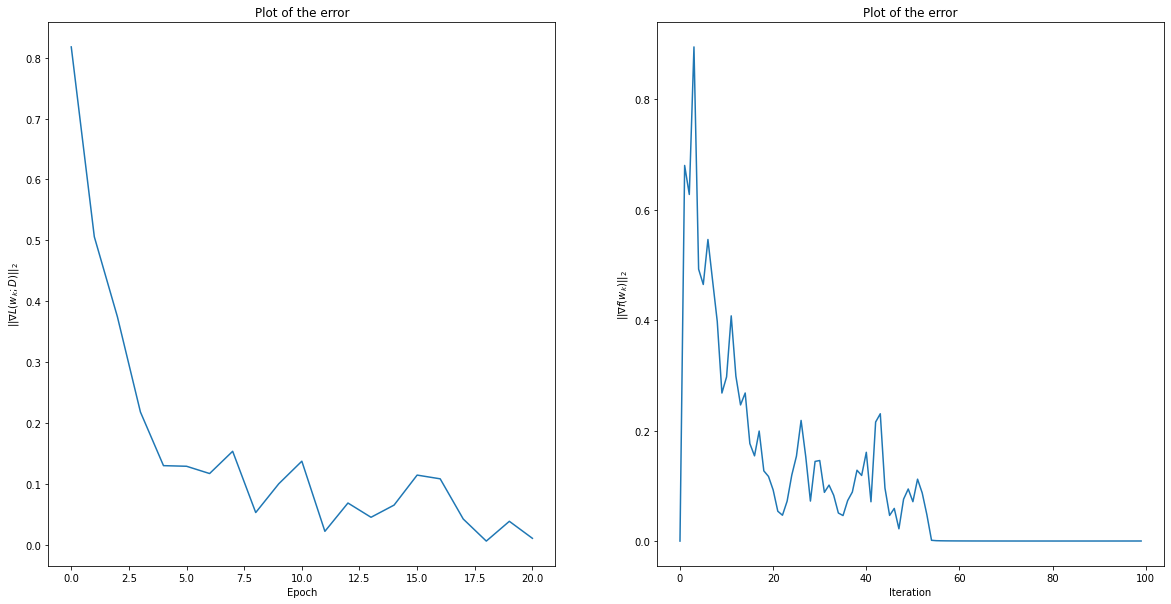

In [145]:
plt.figure(figsize=(20,10))
x_axis = np.arange(n_epochs+1)
plt.subplot(1, 2, 1)
plt.plot(x_axis, err_vec)
plt.xlabel("Epoch")
plt.ylabel(r"$||\nabla L(w_k; D)||_2$")
plt.title("Plot of the error")

plt.subplot(1, 2, 2)
x_axis = np.arange(kmax)
plt.plot(x_axis, err_vec_gd)
plt.xlabel("Iteration")
plt.ylabel(r"$||\nabla f(w_k)||_2$")
plt.title("Plot of the error")

plt.show()